<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 - Maximum Likelihood Estimation (MLE)**

### **2.4.0 - Python Libraries for Maximum Likelihood Estimation (MLE)**

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

### **2.4.1 - MLE for Random Samples**

##### Definition 2.4.1.1 - Maximum Likehood Estimation

Maximum Likelihood Estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

##### Definition 2.4.1.2 - Maximum Likelihood Estimates

Let $X_1, X_2, \ldots, X_n$ have a joint PMF (discrete) or PDF (continuous) of
\begin{equation*}
  f(x_1, x_2, \ldots, x_n; \theta_1, \theta_2, \ldots, \theta_n)
\end{equation*}
where the parameters $\theta_1, \theta_2, \ldots \theta_n$ have unknown values. When $x_1, x_2, \ldots, x_n$ are the observed sample values and $f(x_1, x_2, \ldots, x_n; \theta_1, \theta_2, \ldots, \theta_n)$ is regarded as a function of $\theta_1, \theta_2, \ldots \theta_n$, this function is called the likelihood function. The maximum likelihood estimates (MLEs) $\hat{\theta_1}, \hat{\theta_2}, \ldots, \hat{\theta_n}$ are those values of the $\theta_i$'s that maximize the likelihood function so that
\begin{equation*}
  f(x_1, x_2, \ldots, x_n; \hat{\theta_1}, \hat{\theta_2}, \ldots, \hat{\theta_n}) \geq f(x_1, x_2, \ldots, x_n; \theta_1, \theta_2, \ldots, \theta_n)
\end{equation*}
for all $\theta_1, \theta_2, \ldots, \theta_n)$. The maximum likelihood estimators are obtained when $x_1 = X_1$, $x_2 = X_2$, $\ldots$, $x_n = X_n$.

##### Definition 2.4.1.3 - Maximum Likelihood Estimates in a Normal Distribution

Let $X_1, X_2, \ldots, X_n$ be a random sample from a normal distribution. Then, the likelihood function is
\begin{equation*}
  f(x_1, x_2, \ldots, x_n; \mu, \sigma^2) = \left(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_1 - \mu)^2}{2\sigma^2}}\right)\left(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_2 - \mu)^2}{2\sigma^2}}\right)\cdots\left(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_n - \mu)^2}{2\sigma^2}}\right)
\end{equation*}
\begin{equation*}
  f(x_1, x_2, \ldots, x_n; \mu, \sigma^2) = \left(\frac{1}{\sqrt{2\pi}\sigma}\right)^ne^{-\displaystyle\sum_{i = 1}^n\frac{(x_i - \mu)^2}{2\sigma^2}}
\end{equation*}
The resulting maximum likelihood estimates by taking the partial derivatives of this function with respect to $\mu$ and $\sigma^2$ is
\begin{equation*}
  \hat{\mu} = \overline{X} \quad \hat{\sigma}^2 = \frac{\displaystyle\sum_{i = 1}^n(X_i - \overline{X})}{n}
\end{equation*}

### **2.4.2 - MLE for Linear Regression**

##### Definition 2.4.2.1 - MLE for Linear Regression

Consider $n$ points, each of which is drawn in an independent and identically distributed way from a normal distribution. For a given $\mu$, $\sigma^2$, the probability that those $n$ points are drawn defines the likelihood function, which is the product of the $n$ normal probability density functions (because they are independent).
\begin{equation*}
  P(\mu \ | \ y) = \prod_{i = 1}^n P_Y(y_i \ | \ \mu, \sigma^2) = \prod_{i = 1}^n \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i - \mu)^2}{2\sigma^2}}
\end{equation*}
Since $y$ is a random variable,
\begin{equation*}
  y_i = \hat{y}_i + \epsilon
\end{equation*}
where $\epsilon \sim N(0, \sigma^2)$. Thus, $y_i$ is a normal variable with a mean as a linear function of $x$ and a fixed standard deviation of $y_i \sim N(\hat{y}_i, \sigma^2)$. As a result, for each $y_i$, we choose $\mu$ in the normal distribution as $\mu = \hat{y}_i$. Therefore, the maximum likelihood estimate under linear regression is
\begin{align*}
  \hat{\beta} &= \arg\max P(\beta \ | \ y) \\
  &= \arg\max_\beta \prod_{i = 1}^n \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2}} \\
  &= \arg\max_\beta \ln\left(\prod_{i = 1}^n \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2}}\right) \\
  &= \arg\max_\beta \sum_{i = 1}^n\left(\ln\left(\frac{1}{\sigma\sqrt{2\pi}}\right) + \ln\left(e^{-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2}}\right)\right) \\
  &= \arg\max_\beta \sum_{i = 1}^n \ln\left(e^{-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2}}\right) \\
  &= \arg\max_\beta \sum_{i = 1}^n -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \\
  &= \arg\min_\beta \sum_{i = 1}^n (y_i - \hat{y}_i)^2
\end{align*}
which is equivalent to solving the least squares problem for linear regressions.

### **2.4.3 - Examples of MLE**

In [8]:
# create an independent variable 
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-20.818461
1,-9.595960,-16.913120
2,-9.191919,-19.928005
3,-8.787879,-16.279755
4,-8.383838,-9.518327


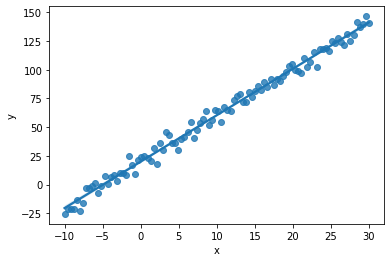

In [5]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

The OLS (ordinary least squares) method in Python for the linear regression is shown below.

In [9]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):          8.04e-102
Time:                        06:01:12   Log-Likelihood:                -291.81
No. Observations:                 100   AIC:                             587.6
Df Residuals:                      98   BIC:                             592.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8686      0.596     33.345      0.000      18.686      21.051
x              4.0061      0.039    103.290      0.000       3.929       4.083
==============================================================================
Omnibus:                        4.400   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.080
Skew:                           0.168   Prob(JB):                       0.0789
Kurtosis:                       4.052   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

4.478031531317802

MLE in Python for the linear regression is shown below.

In [11]:
# MLE
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 291.81220927406804
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.13686828e-05, -1.13686838e-05,  0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 132
      nit: 27
     njev: 33
   status: 0
  success: True
        x: array([19.86861313,  4.00607407,  4.47803075])

### **2.4.4 - References**

1. MAT 494 Chapter 2 Notes
2. https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/
3. https://github.com/RajkumarGalaxy/StructuredData/blob/master/MLE_Maximum_Likelihood_Estimation.ipynb
4. https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f